# Modeling and Simulation in Python

Chapter 8

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [76]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Functions from the previous chapter

In [77]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [78]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Reading the data

In [79]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

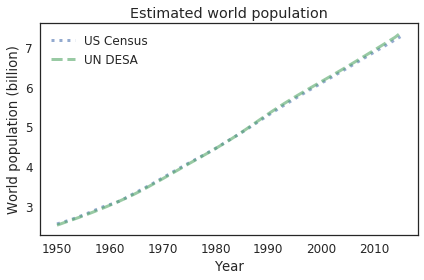

In [80]:
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

### Running the quadratic model

Here's the update function for the quadratic growth model with parameters `alpha` and `beta`.

In [81]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

Extract the starting time and population.

In [82]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = census[t_0]

2.557628654

Initialize the system object.

In [83]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,value
t_0,1950.000000
t_end,2015.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Run the model and plot results.

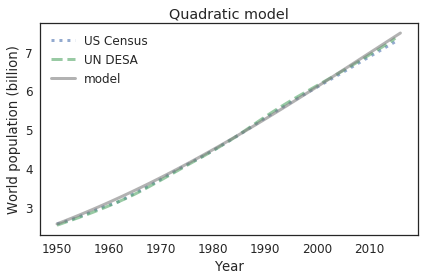

In [84]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

### Generating projections

To generate projections, all we have to do is change `t_end`

Saving figure to file chap04-fig01.pdf


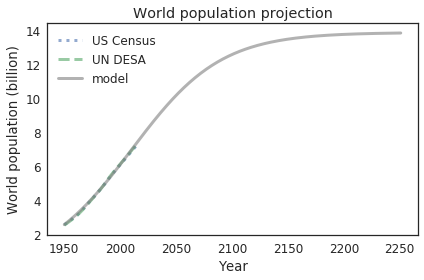

In [85]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('chap04-fig01.pdf')

The population in the model converges on the equilibrium population, `-alpha/beta`

In [86]:
results[system.t_end]

13.856665141368708

In [87]:
-system.alpha / system.beta

13.88888888888889

**Exercise:**  What happens if we start with an initial population above the carrying capacity, like 20 billion?  Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

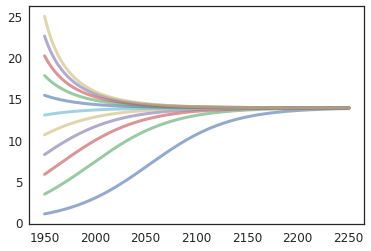

In [88]:
# Solution

p0_array = linspace(1, 25, 11)

for system.p_0 in p0_array:
    results = run_simulation(system, update_func_quad)
    plot(results)

### Comparing projections

We can compare the projection from our model with projections produced by people who know what they are doing.

In [89]:
table3 = tables[3]
table3.head()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973-2015)[6],United Nations Department of Economic and Social Affairs (2015)[7]
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


`NaN` is a special value that represents missing data, in this case because some agencies did not publish projections for some years.

In [90]:
table3.columns = ['census', 'prb', 'un']

This function plots projections from the UN DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

In [91]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), 'b:', label='US Census')
    plot(un_proj.dropna(), 'g--', label='UN DESA')

Run the model until 2100, which is as far as the other projections go.

In [93]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,value
t_0,1950.000000
t_end,2100.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Saving figure to file chap04-fig02.pdf


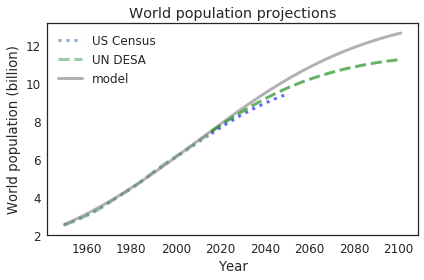

In [94]:
results = run_simulation(system, update_func_quad)

plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('chap04-fig02.pdf')

People who know what they are doing expect the growth rate to decline more sharply than our model projects.

### DataFrame and Series under the hood

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [43]:
table2.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

And `columns`, which labels the columns.

In [44]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [45]:
table2.values

array([[2557628654, 2516000000.0, 2525149000, 2544000000.0, 2527960000.0,
        2400000000.0, 2527000000.0, 2500000000.0, 2400000000.0, nan,
        2486000000.0],
       [2594939877, nan, 2572850917, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2636772306, nan, 2619292068, 2617949000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2682053389, nan, 2665865392, 2665959000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2730228104, nan, 2713172027, 2716927000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2782098943, nan, 2761650981, 2769074000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2835299673, nan, 2811572031, 2822502000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2891349717, nan, 2863042795, 2879934000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2948137248, nan, 2916030167, 2939254000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [3000716593, nan, 2970395814, 2995909000.0, nan, nan, nan, nan,
   

A `Series` does not have `columns`, but it does have `name`.

In [86]:
census.name

'census'

It contains `values`, which is an array.

In [87]:
census.values

array([ 2.55762865,  2.59493988,  2.63677231,  2.68205339,  2.7302281 ,
        2.78209894,  2.83529967,  2.89134972,  2.94813725,  3.00071659,
        3.04300151,  3.08396693,  3.14009322,  3.20982788,  3.28120131,
        3.35042579,  3.42067792,  3.49033371,  3.56231382,  3.63715905,
        3.71269774,  3.79032695,  3.86656865,  3.94209644,  4.01660881,
        4.08908323,  4.16018501,  4.23208458,  4.30410575,  4.37901394,
        4.45136274,  4.53441012,  4.61456656,  4.69573674,  4.77456939,
        4.8564627 ,  4.94057123,  5.02720049,  5.11455717,  5.20144011,
        5.28895593,  5.37158592,  5.45613628,  5.53826832,  5.61868213,
        5.69920299,  5.77944059,  5.85797254,  5.93521325,  6.01207492,
        6.08857138,  6.16521925,  6.24201635,  6.31859096,  6.39569951,
        6.47304473,  6.55126353,  6.62991376,  6.70904978,  6.78821439,
        6.86633236,  6.94405558,  7.02234928,  7.10102789,  7.17872289,
        7.25649001])

And it contains `index`:

In [10]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [46]:
type(table2)

pandas.core.frame.DataFrame

In [47]:
type(table2.index)

pandas.core.indexes.numeric.Int64Index

In [48]:
type(table2.columns)

pandas.core.indexes.base.Index

In [49]:
type(table2.values)

numpy.ndarray

In [50]:
type(census)

pandas.core.series.Series

In [51]:
type(census.index)

pandas.core.indexes.numeric.Int64Index

In [52]:
type(census.values)

numpy.ndarray

## Exercises

### Exponential, geometric, and polynomial growth

**Exercise:**  Suppose there are two banks across the street from each other, The First Geometric Bank (FGB) and Exponential Savings and Loan (ESL).  They offer the same interest rate on checking accounts, 3%, but at FGB, they compute and pay interest at the end of each year, and at ESL they compound interest continuously.

If you deposit $p_0$ dollars at FGB at the beginning of Year 0, the balanace of your account at the end of Year $n$ is

$ x_n = p_0 (1 + \alpha)^n $

where $\alpha = 0.03$.  At ESL, your balance at any time $t$ would be

$ x(t) = p_0 \exp(\alpha t) $

If you deposit \$1000 at each back at the beginning of Year 0, how much would you have in each account after 10 years?

Is there an interest rate FGB could pay so that your balance at the end of each year would be the same at both banks?  What is it?

Hint: `modsim` provides a function called `exp`, which is a wrapper for the NumPy function `exp`.

In [53]:
# Solution

p_0 = 1000
alpha = 0.03

0.03

In [54]:
# Solution

ts = linrange(11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [58]:
# Solution

geometric = p_0 * (1 + alpha) ** ts

array([1000.        , 1030.        , 1060.9       , 1092.727     ,
       1125.50881   , 1159.2740743 , 1194.05229653, 1229.87386542,
       1266.77008139, 1304.77318383, 1343.91637934, 1384.23387072])

In [59]:
# Solution

exponential = p_0 * exp(alpha * ts)

array([1000.        , 1030.45453395, 1061.83654655, 1094.17428371,
       1127.49685158, 1161.83424273, 1197.21736312, 1233.67805996,
       1271.24915032, 1309.96445073, 1349.85880758, 1390.96812846])

In [60]:
# Solution

alpha2 = exp(alpha) - 1

0.030454533953516938

In [61]:
# Solution

geometric = p_0 * (1 + alpha2) ** ts

array([1000.        , 1030.45453395, 1061.83654655, 1094.17428371,
       1127.49685158, 1161.83424273, 1197.21736312, 1233.67805996,
       1271.24915032, 1309.96445073, 1349.85880758, 1390.96812846])

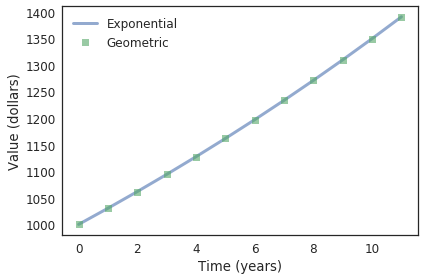

In [64]:
# Solution

plot(ts, exponential, '-', label='Exponential')
plot(ts, geometric, 's', label='Geometric')

decorate(xlabel='Time (years)',
         ylabel='Value (dollars)')

**Exercise:** Suppose a new bank opens called the Polynomial Credit Union (PCU).  In order to compete with First Geometric Bank and Exponential Savings and Loan, PCU offers a parabolic savings account where the balance is a polynomial function of time:

$ x(t) = p_0 + \beta_1 t + \beta_2 t^2 $

As a special deal, they offer an account with $\beta_1 = 30$ and $\beta_2 = 0.5$, with those parameters guaranteed for life.

Suppose you deposit \$1000 at all three banks at the beginning of Year 0.  How much would you have in each account at the end of Year 10?  How about Year 20?  And Year 100?

In [67]:
# Solution

number_of_years = 100
ts = linrange(number_of_years+1)
geometric = p_0 * (1 + alpha2) ** ts
exponential = p_0 * exp(alpha * ts)
None

In [70]:
# Solution

beta1 = 30
beta2 = 0.5
parabolic = p_0 + beta1 * ts + beta2 * ts**2
None

In [71]:
# Solution

def plot_results():
    plot(ts, exponential, '-', label='Exponential')
    plot(ts, geometric, 's', label='Geometric')
    plot(ts, parabolic, 'o', label='Parabolic')
    
    decorate(xlabel='Time (years)',
             ylabel='Value (dollars)')

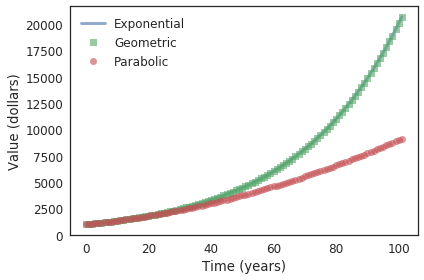

In [72]:
# Solution

plot_results()

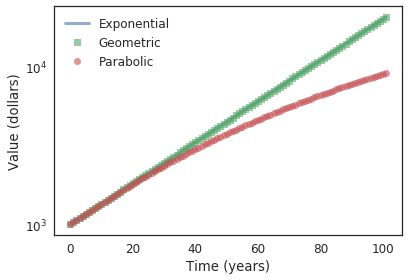

In [74]:
# Solution

plot_results()
plt.yscale('log')